# Predicting Loan Payments with Decision Trees

***Datasource: https://www.kaggle.com/wordsforthewise/lending-club***

### Lending Club connects people who need money (borrowers) with people who have money (investors). I'm going to use their data from 2007-2010 to try to classify and predict whether or not a borrower paid back their loan in full.

***Disclaimer:
Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016)***

***Here are what the columns represent:***
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

%matplotlib inline

## Get the Data

***Create a Pandas dataframe***

In [2]:
loan_df = pd.read_csv('loan_data.csv')

**Check the properties of the dataframe**

In [3]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loan_df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
loan_df.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


# Exploratory Data Analysis

***I'm creating a histogram of FICO distributions on top of each other, one for each credit.policy outcome***

***It looks like borrowers with a lower FICO Score tend to have a Credit.Policy=0 with a hard cutoff around 660***

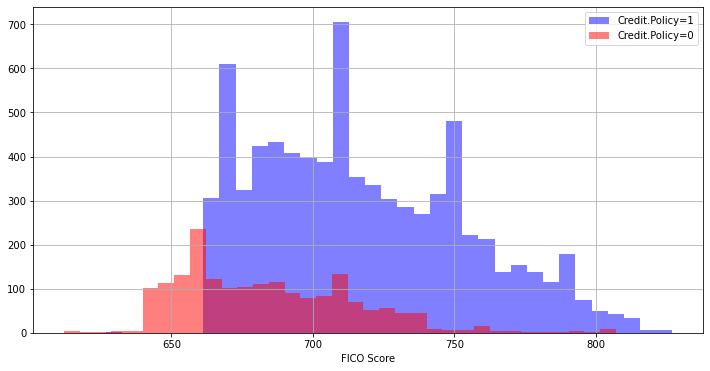

In [6]:
plt.figure(figsize=(12,6))
loan_df[loan_df['credit.policy']==1]['fico'].hist(alpha=0.5,color='b',
                                              bins=35,label='Credit.Policy=1')
loan_df[loan_df['credit.policy']==0]['fico'].hist(alpha=0.5,color='r',
                                              bins=35,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO Score')
plt.show()

***I'll create another similar histogram, but using the not.fully.paid column instead***

***The majority of borrowers are fully paid, and there's more or less a very similar distribution between not.fully.paid=1 & not.fully.paid=0***

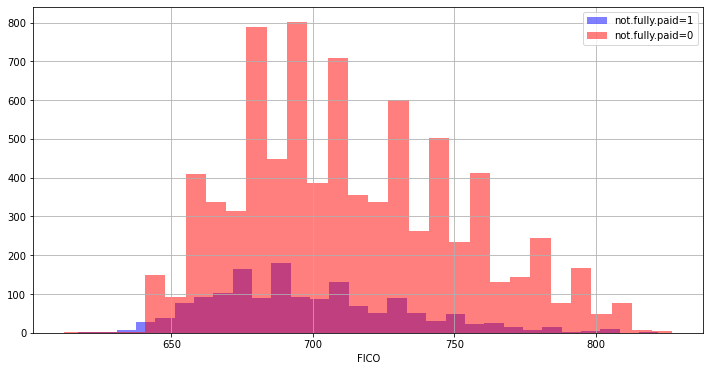

In [7]:
plt.figure(figsize=(12,6))
loan_df[loan_df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='b',
                                              bins=30,label='not.fully.paid=1')
loan_df[loan_df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='r',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')
plt.show()

***I want to make a countplot comparing the total amount of fully paid loans to unpaid loans, grouped by by purpose***

***Debt consolidation is by far the most popular reason for wanting a loan. Home improvement, Small Business, Major Purchase, and Educational are among the least popular reasons. An interesting observation here is that the proportion of paid to upaid loans across each group are pretty similar.***

<AxesSubplot:xlabel='purpose', ylabel='count'>

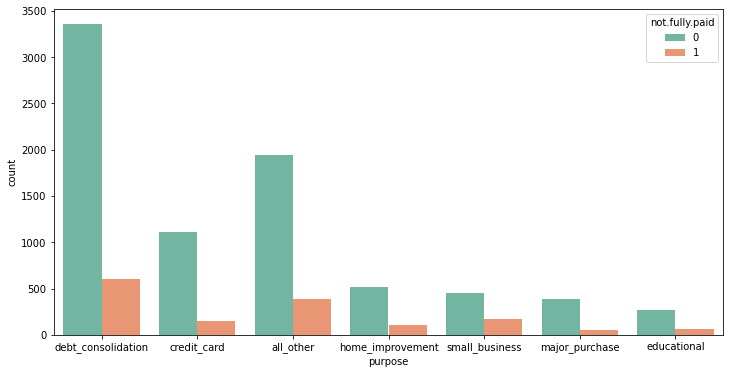

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(x='purpose',data=loan_df,hue='not.fully.paid',palette='Set2')

***I'll use a jointplot to analyze the trend between FICO score and interest rate***

***As a borrower's FICO score increases, the interest rate for the loan tends to decrease***

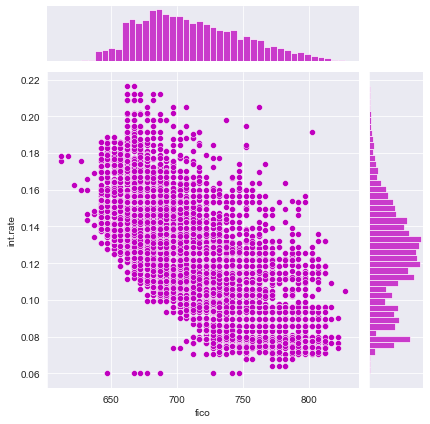

In [9]:
sns.set_style("darkgrid")
sns.jointplot(data=loan_df,x='fico',y='int.rate',color='m')

***I want to create two side by side lmplots to see if the trend differs between not.fully.paid and credit.policy***

***The behavior here looks relatively the same whether the loans was fully paid or not or whether or not the borrower was denied the credit policy.***

<Figure size 864x432 with 0 Axes>

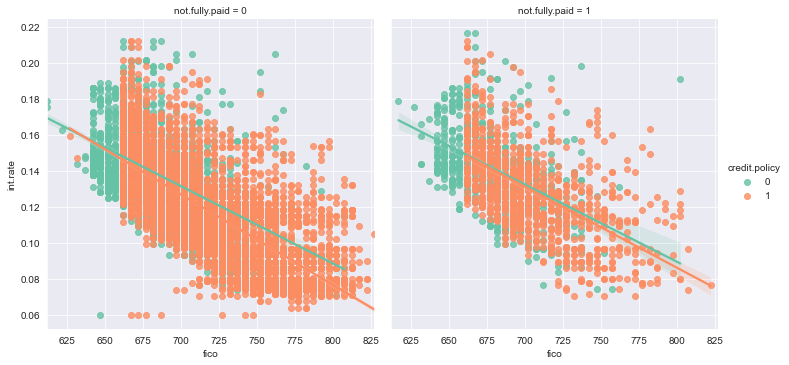

In [10]:
plt.figure(figsize=(12,6))
sns.lmplot(data=loan_df,x='fico',y='int.rate',hue='credit.policy',col='not.fully.paid',palette='Set2')

# Setting up the Data

***I'll take some time to make sure the data is setup properly ready to be used by the Classification Model!***

### Deal With Categorical Features

***The purpose column is a categorical feature so I need to transform these features by using dummy variables that sklearn will be able to understand***

In [11]:
cat_feats = ['purpose']

***I'll use Pandas get_dummies function to create a fixed larger dataframe that has new feature columns with dummy variables***

In [12]:
final_loan_df = pd.get_dummies(loan_df,columns=cat_feats,drop_first=True)

## Train Test Split

***Now its time to split the data into a training set and a testing set***

In [13]:
X = final_loan_df.drop('not.fully.paid',axis=1)
y = final_loan_df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=101)

## Training a Decision Tree Model

***First, I'll create an instance of DecisionTreeClassifier, and begin by training a single decision tree***

In [14]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree
**Then I'll use it to make predictions from the test set and create a classification report and a confusion matrix.**

In [15]:
predictions = dtree.predict(X_test)

In [16]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2431
           1       0.18      0.23      0.20       443

    accuracy                           0.72      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.72      0.74      2874

[[1978  453]
 [ 341  102]]


***The decision tree has a precison and recall of around 74%***

* ***1978 True Positive***
* ***102 True Negative***
* ***341 False Negative***
* ***453 False Positive***

## Training the Random Forest model

***Now I'll try a RandomForestClassifier, and see if it can outperform the single decision tree***

In [17]:
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

## Predictions and Evaluation of Random Forest

**Then I'll use it to make predictions from the test set and create a classification report and a confusion matrix.**

In [18]:
rfc_pred = rfc.predict(X_test)

In [19]:
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.02      0.03       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874

[[2423    8]
 [ 435    8]]


* ***2423 True Positive***
* ***8 True Negative***
* ***435 False Negative***
* ***8 False Positive***

## Conclusion

***Overall, the Random Forest has the better Precision and Recall. However, The Recall and F1 for not.fully.paid=1 scores from the Random Forest classifier were much worse than the Decision Tree. The cost associated with each model would likely be the determining factor of which one would be considered the best model to use with this particular dataset.***